$$\newcommand{\ket}[1]{\left|{#1}\right\rangle}$$
$$\newcommand{\bra}[1]{\left\langle{#1}\right|}$$
$$\newcommand{\zerostate}{\begin{bmatrix} 1 \\ 0 \end{bmatrix}}$$
$$\newcommand{\onestate}{\begin{bmatrix} 0 \\ 1 \end{bmatrix}}$$
$$\newcommand{\ketzero}{\ket{0}}$$
$$\newcommand{\ketone}{\ket{1}}$$

# Introduction

The goal of this workshop is to introduce you to "Qiskit" or the *Quantum Information Science toolkit*, a set of tools designed to let you easily build and test quantum circuits as well as algorithms.

# Review of Multiple Qubit Gates

In our last workshop, we took a look at working with gates that operated on more than one qubit, such as SWAP, CNOT, CSWAP and even our very own gate, the CH or **Control Hadamard** gates. We also looked at partial measurements, applying gates in parallel (one gate on EACH qubit) and entangled states

## Composing two-qubit states

The first thing we need in order to work with multiple qubits is a way to represent them. We can't just have two vectors floating around for each qubit in our system.

Instead, we apply the **tensor product** or more commonly refered to as the **Kronecker Product** to two or more basis states of interest. For example, if I wanted to begin with two qubits with the first in $\ket{0}$ and the second in $\ket{1}$, I do the following:

$$
\ketzero \otimes \ketone = \ket{01}
$$

Removing the Dirac Notation, the operation looks like this:

$$
\zerostate
\otimes
\onestate
=
\begin{bmatrix}
1 & \onestate \\
0 & \onestate \\
\end{bmatrix}
= 
\begin{bmatrix}
0 \\
1 \\
0 \\
0 \\
\end{bmatrix}
$$

Furthermore, multiple qubit systems must still be **normalized** meaning the probability of measuring all states must add up to 1:

$$ \ket{\text{two-qubit}} = a\ket{00} + b\ket{01} + c\ket{10} + d\ket{11} $$
$$ \left| a \right|^2 + \left| b \right|^2 + \left| c \right|^2 + \left| d \right|^2 = 1 $$

### *n*-qubit states

For a beefier example of the Kronecker product, let's say I want to represent three qubits, in the state $\ket{010}$

This means we must do the following to get the state vector:
$$
\ketzero \otimes \ketone \otimes \ketzero = \ket{010}
$$

We'll have to perform two Kronecker products. From our previous example, we know that 
$$
\ketzero \otimes \ketone = \ket{01}
$$

Where 
$$
\ket{01}
=
\begin{bmatrix}
0 \\
1 \\
0 \\
0 \\
\end{bmatrix}
$$

Now we just have to do the following:
$$
\ket{01} \otimes \ketzero =
\begin{bmatrix}
0 \\
1 \\
0 \\
0 \\
\end{bmatrix}
\otimes
\ketzero
=
\begin{bmatrix}
0 & \zerostate \\
1 & \zerostate \\
0 & \zerostate \\
0 & \zerostate \\
\end{bmatrix}
= 
\begin{bmatrix}
0 \\
0 \\
1 \\
0 \\
0 \\
0 \\
0 \\
0 \\
\end{bmatrix}
$$

## Probability Encoding 

A tip that was given in the last workshop was to remember that you can treat each row entry value in a qubit or multi-qubit vector as the chance that you'll get the binary value (minus one) representing the entry's position, starting from zero, upon measurement.

To clarify, we can look at a two-qubit state vector like so:
$$
\ket{\text{two-qubit}} = 
\begin{bmatrix}
a_{00} \\
a_{01} \\
a_{10} \\
a_{11} \\
\end{bmatrix}
$$

Each entry is a value representing the chance you'll get $\ket{00}$, $\ket{01}$. Granted, you need to take the absolute value of that entry and square it but the important thing to note is the positions of the entries.

The first entry encodes the chance of getting $1 - 1 = 0$ or $\ket{00}$. The second entry encodes the chance of get $2 - 1 = 1$ or $\ket{01}$. The third entry encodes the chance of getting $3 - 1 = 2$ or $\ket{10}$, so on and so forth.

This example is easily extendable to large vectors like the one we made above that represents three qubits in the $\ket{010}$ configuration:
$$
\ket{010} = 
\begin{bmatrix}
0 \\
0 \\
1 \\
0 \\
0 \\
0 \\
0 \\
0 \\
\end{bmatrix}
$$
We see that the third entry is $1$ so $3 - 1 = 2$ and $2$ in binary is $010$ so our chances of measuring $\ket{010}$ is $1$ or 100%.

## Partial Measurement

With two qubits, the number of ways you can measure the qubits also grows.

We could measure all two qubits simultaneously but you could also measure one qubit first, and then the other.

This changes the probability distribution of the entire set of qubits because we've forced one qubit to be in one state so certain configurations are immediately impossible to have.

For example, if I measure my first qubit to be $\ketzero$, then the remaining probability of the two qubits is spread across $\ket{00}$ and $\ket{01}$:

$$
\frac{\alpha\ket{00} + \beta\ket{01}}{\sqrt{\left| \alpha \right|^2 + \left| \beta \right|^2}}
$$


Where $\alpha$ and $\beta$ are found in the full two-qubit vector as the probabilities of $\ket{00}$ and $\ket{01}$ respectively

Note that $\ket{10}$ and $\ket{11}$ have no chance of occuring because these states require the first qubit to be $\ketone$

## Multi-Qubit Gates

With our vectors now having four instead of two entries, the gates we apply to these qubits have to be represented by $4 \times 4$ matrices instead of $2 \times 2$.

A lot of attention was given in the last workshop to **Control Class Gates** which use one qubit for **Control** and the other qubit as a **Target**. If the control qubit is $\ket{1}$, some operation is applied to the target qubit.

They had the following matrix "template":
$$
\begin{bmatrix}
1 & 0 & 0 & 0 \\
0 & 1 & 0 & 0 \\
0 & 0 & u_{00} & u_{01} \\
0 & 0 & u_{10} & u_{11} \\
\end{bmatrix}
$$

which is of the form of a **Block Diagonal Matrix** with the lower right corner being any single-qubit gate you can think of (X, Hadamard, Rotation, etc.) 

The gates we paid special attenion to were:

### CNOT

If the control qubit is $\ket{1}$, a full NOT/X gate is applied to the target qubit.

If I have a state such as $\ket{11}$, then the resulting state should be $\ket{01}$

$$
CNOT =
\begin{bmatrix}
1 & 0 & 0 & 0 \\
0 & 1 & 0 & 0 \\
0 & 0 & 0 & 1 \\
0 & 0 & 1 & 0 \\
\end{bmatrix}
$$

### CH

A gate we created last time where we took a Hadamard:

$$
H = 
\frac{1}{\sqrt{2}}
\begin{bmatrix}
1 & 1 \\
1 & -1 \\ 
\end{bmatrix}
$$

And embedded it using the Control Gate template:

$$
CH = 
\begin{bmatrix}
1 & 0 & 0 & 0 \\
0 & 1 & 0 & 0 \\
0 & 0 & \frac{1}{\sqrt{2}} & \frac{1}{\sqrt{2}}  \\
0 & 0 & \frac{1}{\sqrt{2}} & -\frac{1}{\sqrt{2}} \\
\end{bmatrix}
$$

If the control qubit is $\ketone$, a Hadamard gets applied to the target qubit.

### SWAP

Swaps one qubit for the other. If I have two qubits in the state $\ket{01}$, we perform the swap and should see $\ket{10}$ as the result.

$$ 
SWAP =
\begin{bmatrix}
1 & 0 & 0 & 0 \\
0 & 0 & 1 & 0 \\
0 & 1 & 0 & 0 \\
0 & 0 & 0 & 1 \\
\end{bmatrix}
$$

### CSWAP

CSWAP is a three qubit gate. It takes one qubit as the control and two qubits as its targets. If the first qubit is $\ketone$ then it performs a swap of the two target qubits.

So, if I'm in a state such as $\ket{110}$, I should get $\ket{101}$ afterwards

$$
CSWAP = 
\begin{bmatrix}
1 & 0 & 0 & 0 & 0 & 0 & 0 & 0 \\
0 & 1 & 0 & 0 & 0 & 0 & 0 & 0 \\
0 & 0 & 1 & 0 & 0 & 0 & 0 & 0 \\
0 & 0 & 0 & 1 & 0 & 0 & 0 & 0 \\
0 & 0 & 0 & 0 & 1 & 0 & 0 & 0 \\
0 & 0 & 0 & 0 & 0 & 0 & 1 & 0 \\
0 & 0 & 0 & 0 & 0 & 1 & 0 & 0 \\
0 & 0 & 0 & 0 & 0 & 0 & 0 & 1 \\
\end{bmatrix}
$$

## Parallel Gates

### One Gate on One Qubit

If we only want to apply a gate to one qubit in a system of two qubits, but leave the other one alone, we generate a $4 \times 4$ matrix using the Kronecker product.

If I want to apply a Hadamard to the first, but not the second qubit, I create the matrix like so:

$$ H \otimes I$$

Notice that for the qubit I don't want to modify, I just put the Identity matrix in its place. 

### Two Gates on Two Qubits

If I want to apply two gates on the two qubit system, but each gate only targets one qubit, we still use the Kronecker product but with the gates we want. 

For example, if I want to apply a Hadamard to *EACH* qubit, I generate the $4 \times 4$ matrix like so:

$$
H^{\otimes2}= H \otimes H = 
\frac{1}{2}
\begin{bmatrix}
1 & 1 & 1 & 1 \\
1 & -1 & 1 & -1 \\
1 & 1 & -1 & -1 \\
1 & -1 & -1 & 1\\
\end{bmatrix}
$$

## Entanglement

Entanglement is when we have two or more qubits that cannot be defined as independent quantum systems. That is, if we perform some action on one qubit, it immediately affects the other, as if they are intrinsincally linked.

We found that you could generate an entangled state like so:

To entangle two qubits, we perfor two steps:

1. Apply a Hadamard to the control qubit of a CNOT gate
2. Apply the CNOT on some target qubit in a known state

Mathematically, this gives:

$$ CNOT \cdot (H \otimes I) \ket{00} = \ket{entangled} $$

Remember that due to matrix multiplication, the LAST gate applied gets multiplied FIRST (order maters in matrix multiplication!)

We started with the $\ket{00}$ state above so the resulting state is:

$$
\begin{bmatrix}
\frac{1}{\sqrt{2}} \\
0 \\
0 \\
\frac{1}{\sqrt{2}} \\
\end{bmatrix}
$$

Applying the "Probability Encoding" principle, we know that this system has a $\frac{1}{2}$ chance of being in $\ket{00}$ and a $\frac{1}{2}$ chance of being in $\ket{11}$

The true power of this configuration isn't too apparent until we do a partial measurement.

I measure the first qubit and get $\ket{0}$. That means I can only have $\ket{00}$ and $\ket{01}$ as final probabilities. 

I plug in the vector coefficients and we notice a rather remarkable phenomenon

$$
\frac{\frac{1}{\sqrt{2}}\cdot\ket{00} + 0\cdot\ket{01}}{\sqrt{\left| \frac{1}{\sqrt{2}} \right|^2 + \left| 0 \right|^2}}
$$

This simplifies to:
$$
1\cdot\ket{00} + 0\cdot\ket{01}
$$

By the very act of measuring the first qubit, the other qubit instantaneously becomes $\ket{0}$ as well which means we can't do one operation on one qubit without it immediately affecting the other! 

# Quantum Circuits: What are They?

Up to this point, we've been using pure math to represent qubit operations.

Our qubits are represented nicely by vectors (more formally known as **State Vectors** ) and each **gate**, a kind of quantum mechanical **operator** representable by a matrix with dimensions to match the statevector.

Furthermore, all of our operations follow this framework:

1. Put the qubits in some starting state 
2. Apply gates on those qubits
3. Measure/Analyze the result

This method of doing things is a model of Quantum Computation known as the **Quantum Circuit**. A great majority of Quantum Computing algorithms are expressible as Quantum Circuits and the majority of research in making better and faster Quantum Computers is oriented towards this model.

The following is a common diagram representation of a Quantum Circuit

![Quantum Circuit Example](img/quantum_circuit_example.jpeg)


Each line represents a single qubit. The $\ketzero$ to the left of each line indicates the starting state of the qubit.

The diagrams are read left from right. Each block is a gate acting on a single qubit. The letters on each block denote the kind of gate. For example, if we look at the first line at the top, the block with "H" would be considered a Hadamard, a block with "X" the NOT/X gate introduced in the first workshop, etc.

The dark dot with a line connecting to a white circle is a multi-qubit gate. To be more specific, it is the CNOT gate. The dark dot is the control qubit while the white circle is the target qubit. 

After we've applied all these gates to all of the qubits we perform a **measurement**, which collapses the qubit into the $\ketone$ or $\ketzero$ state and we can store that data into our normal computers.

# Qiskit: Your Friend for Quantum Circuits

<img src="img/qiskit_logo.jpg" alt="qiskit_logo" style="width: 400px;"/>

"Qiskit" or the "Quantum Information Science toolkit" is a framework developed by IBM to make it a lot easier to develop, test, and deploy Quantum Circuits/Algorithms.

Instead of having to deal with pure vectors and matrices, Qiskit provides a layer of abstraction and many tools on top of that to make it easier to play with and learn Quantum Computing. 

## Structure

Qiskit itself is composed of four (literal) elements: **Terra**, **Aer**, **Aqua**, and **Ignis**

<img src="img/qiskit_elements.png" alt="qiskit_elements" style="width: 400px;"/>

Each element is oriented towards a different part of the Quantum Circuit development process.

### *Terra*

This is what we'll be using the most for our purposes.

It contains the basic Quantum Circuit base that we can put our gates on as well as powerful tools for visualizing single and multi-qubit states.

It also allows you to connect to **providers**, the machine that will execute your circuit. Most of the time, this will be some quantum computer simulator on your machine but you have the option to run your circuits on an actual IBM Quantum Computer as well!

### *Aer*

Aer is responsible for simulating the quantum circuit on our machines. We could send the circuit to an actual quantum computer but this takes a great deal of time (there's a queue you have to put your circuit on and you have to wait for one of IBM's Quantum Computers to become available). 

Futhermore, Aer also lets us create noise models, which simulate the imperfect results of an actual quantum computer. 

### *Aqua*

Aqua goes one step above Aer in providing algorithms that are realizable on current Quantum Computing hardware and in applications such as AI, Chemistry, Finance, etc. 

### *Ignis*

Ignis helps you characterize and reduce noise in quantum circuits, measuring noise and gate performance as well as calibrations for real-world quantum computing.



# Building And Visualizing Your First Circuit

Let's go ahead and build our first circuit.

You'll see the next few cells beneath this one explain how it all works.

In [2]:
# We'll need to import all the parts of Qiskit into our environment first
from qiskit import *
import numpy as np
# This funky looking line just tells the Jupyter Notebook to render nice images of our circuits
%matplotlib inline

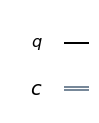

In [3]:
# We create a QuantumCircuit object. Note that we give it the argument "1,1". This means that we'll have one qubit
# and one classical register, which should store the result of the qubit
qc = QuantumCircuit(1,1)
# We can now draw our circuit to see it! (The "output=mpl" just tells Qiskit to use matplotlib to format things more nicely)
qc.draw(output="mpl")

Huh, doesn't look like much, but it's a start! Note that the top, single line is our qubit and the bottom two lines represent our classical register.

Let's try a large circuit base circuit example:|

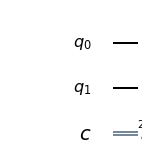

In [4]:
# This time, we create a circuit with two qubits and a classical register with two bits
qc = QuantumCircuit(2,2)
# Draw the circuit
qc.draw(output="mpl")

You'll notice that the qubits now have subscripts to distinguish one from the other, but the classical register (the line at the bottom) just has a supersript of "2" to indicate it can store two classical bits.

To see the output of a circuit, we'll need to choose a back end to simulate it on. This is where **Aer** comes in:

In [5]:
# We pick a backend, in this case, the 'statevector_simulator'
# The 'statevector_simulator' behaves just as if we were doing the pure, raw math.
# It doesn't factor for any "noise" or imperfect results from the real world and is a good way to bridge what we've
# learned in terms of matrices and statevectors to actual circuits

simulator = Aer.get_backend('statevector_simulator')

# Now we execute our circuit, "qc", on the backend
result = execute(qc, backend=simulator).result()
# Get the statevector out of the result
statevector = result.get_statevector()
# Now we print the result
print(statevector)

[1.+0.j 0.+0.j 0.+0.j 0.+0.j]


Notice that we're given a vector with four entries, just as expected from a system with two qubits. Furthermore, note that the first entry is $1$ which means that we're in the $\ket{00}$ state

We can also, like we did with `qutip`, visualize the states:

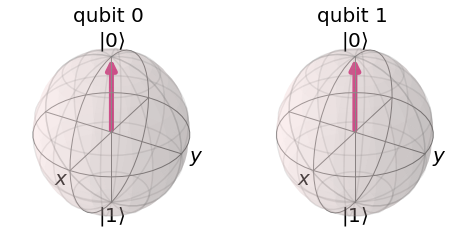

In [6]:
from qiskit.tools.visualization import plot_bloch_multivector
plot_bloch_multivector(statevector)

Note that qiskit is smart enough to plot two Bloch spheres, one for each of our qubits.

This works for qubits that are independent of eachother, but once we perform entanglement, the two or more bloch sphere visualization method falls apart entirely (because we can't represent four possible states and their superpositions on a single, yet alone multiple spherical surfaces)

# Apply Gates to Your Circuit

The above example was a circuit that did literally nothing (other than teaching you how to start your circuit off and analyze the results for a start!). 

Now we're going to apply some gates to our circuit and make it do stuff.

We'll apply a Hadamard to each of our qubits like so:

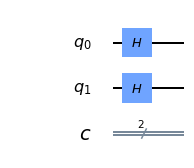

In [7]:
# We need a circuit with 2 qubits and 2 classical registers to hold those values
qc = QuantumCircuit(2,2)
# Now we want to apply a Hadamard to each qubit
# Each qubit is indexable, so the "(0)" just means the first qubit and the "(1)" means the second qubit, so on and so forth
# The "h()" is just short for Hadamard
qc.h(0)
qc.h(1)
# Lets see what we have so far!
qc.draw(output="mpl")

Nice! Looks like the gates were applied successfully. We have two boxes, each one representing a single qubit gate, and each one sitting on one of our qubits. 

Let's see what the result is:

In [8]:
# execute our circuit, "qc", on the backend
# Remember, we chose our simulator to be the "statevector" one which gives us precise, mathematical results
# like the ones we've calcuated in the past with qutip and numpy
result = execute(qc, backend=simulator).result()
# Get the statevector out of the result
statevector = result.get_statevector()
# Now we print the result
print(statevector)

[0.5+0.j 0.5+0.j 0.5+0.j 0.5+0.j]


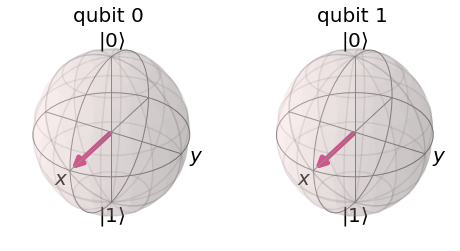

In [9]:
# Lets go ahead and visualize this state too!
plot_bloch_multivector(statevector)

We get a result that's exactly as we expected, each individual qubit has been put in its own perfect superposition

Let's go ahead and flip all of our qubits from $\ket{000}$ to $\ket{111}$, just to work with a large example

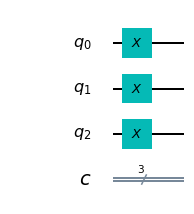

In [10]:
# Create a circuit that has three qubits and three classical registers
qc = QuantumCircuit(3,3)
# Apply the "X" gate to flip the states of each qubit from |0> to |1>
qc.x(0)
qc.x(1)
qc.x(2)
# Let's take a look
qc.draw(output="mpl")

Looks like everything is right, we've got an "X" gate on every qubit. 

Let's take a look at the results:

In [11]:
# execute our circuit, "qc", on the statevector backend
result = execute(qc, backend=simulator).result()
# Get the statevector out of the result
statevector = result.get_statevector()
# Now we print the result
print(statevector)

[0.+0.j 0.+0.j 0.+0.j 0.+0.j 0.+0.j 0.+0.j 0.+0.j 1.+0.j]


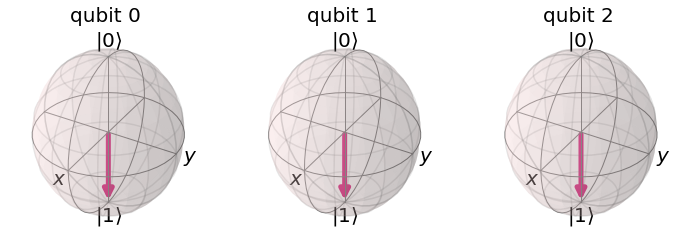

In [12]:
plot_bloch_multivector(statevector)

All three of our qubits are in the $\ket{1}$ position, just as we expected.

## Multi-Qubit Gates

Let's play around with some of the gates we know that use multiple qubits and see how they behave in Qiskit.

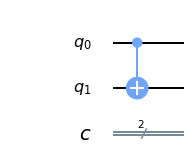

In [13]:
# CNOT is a two qubit gate, so we're going to need at LEAST two qubits
qc = QuantumCircuit(2,2)
# We choose the first qubit, qubit "0" as our control and "1" as our target
qc.cx(0,1)
# now let's visualize it
qc.draw(output="mpl")

The darker, smaller circle is on the control qubit while the circle with the white "plus" is on the target qubit.

Time for results!

[1.+0.j 0.+0.j 0.+0.j 0.+0.j]


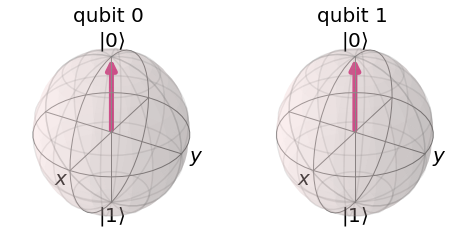

In [14]:
# execute our circuit, "qc", on the statevector backend
result = execute(qc, backend=simulator).result()
# Get the statevector out of the result
statevector = result.get_statevector()
# Now we print the result
print(statevector)
# Show the bloch spheres too
plot_bloch_multivector(statevector)

Wait! Nothing happened! 

That's exactly what we expect from the CNOT gate. Remember, the control class of qubit gates will only do something to the target qubit if the control qubit is $\ketone$

That means we need to somehow chang the state our qubits start in from $\ket{00}$ (the default) to $\ket{10}$ to trigger something meaningful.

We can put any of our qubits in some arbitrary state like so:

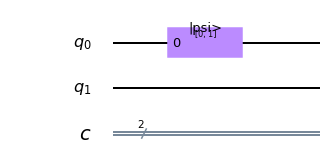

In [15]:
# Create the quantum circuit
qc = QuantumCircuit(2,2)
# Create the desired state vector for the first qubit:
# (you should recognize this as the equivalent of |1>)
desired_vector = [0, 1]
# Initialize the first vector with that state like so:
qc.initialize(desired_vector, [0])
# Now visualize
qc.draw(output="mpl")

[0.+0.j 1.+0.j 0.+0.j 0.+0.j]


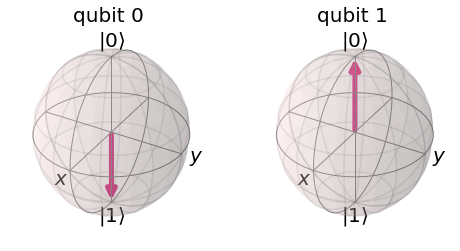

In [16]:
# Let's make sure the state truly is |10>
result = execute(qc, backend=simulator).result()
result
statevector = result.get_statevector()
print(statevector)
plot_bloch_multivector(statevector)

Nice! The first qubit has been set to $\ketone$. Now let's apply that CNOT gate and see what happens

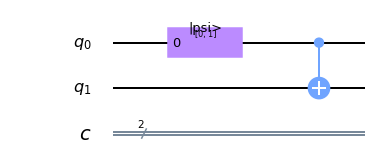

In [17]:
qc.cx(0,1)
qc.draw(output="mpl")

[0.+0.j 0.+0.j 0.+0.j 1.+0.j]


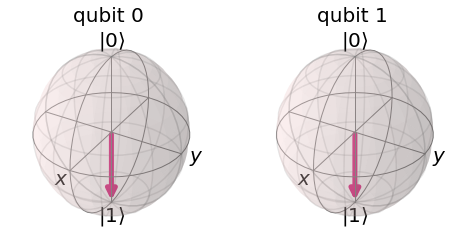

In [18]:
result = execute(qc, backend=simulator).result()
statevector = result.get_statevector()
print(statevector)
plot_bloch_multivector(statevector)

With the first qubit as $\ketone$ the second qubit (our target) was successfully flipped from $\ketzero$ to $\ketone$

Let's try a more complex example with the CSWAP gate. Remember, CSWAP takes three qubits, one control and two targets.
When the control is in $\ketone$, the targets are fliped.

We'll start off in the start $\ket{110}$ so we can see something happen. Our result should be (if the first qubit is the control and the remaining two are targets) be something $\ket{101}$.


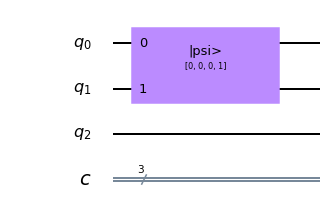

In [19]:
# The circuit will need at least three qubits
qc = QuantumCircuit(3,3)

# The following lines should look somewhat familiar from the last workshop where we defined
# basis states for qutip.

# We have |1> established as a 2 x 1 matrix (equivalent to a column vector with two entries)
s_1 = np.array([[0, 1]]).T
# We do |1> with the kronecker product of itself to get: |11>
# but we apply ".T" to get the column vector into row vector format 
s_11 = np.kron(s_1, s_1).T
# The s_11.tolist()[0] converts the numpy stuff to normal python array which makes the result
# [[0,0,0,1]]. We don't want the nested arrays, so I use [0] to select the first (and only)
# element inside which is [0,0,0,1] by itself
# The [0,1] tells Qiskit to apply this vector to the first two qubits
qc.initialize(s_11.tolist()[0], [0,1])
qc.draw(output="mpl")

[0.+0.j 0.+0.j 0.+0.j 1.+0.j 0.+0.j 0.+0.j 0.+0.j 0.+0.j]


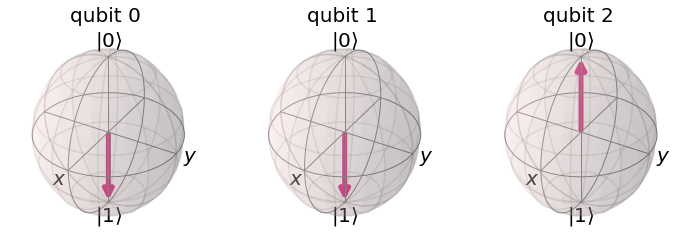

In [20]:
# To be safe, lets make sure we're in the |110> state
result = execute(qc, backend=simulator).result()
statevector = result.get_statevector()
print(statevector)
plot_bloch_multivector(statevector)

Looks like all are states are what they're supposed to be, lets go ahead and apply the CSWAP:

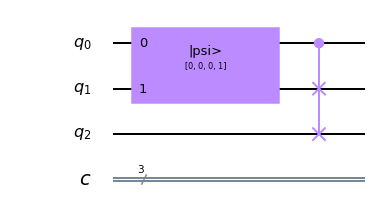

In [21]:
# The first qubit is our control, the second and third are our targets
qc.cswap(0,1,2)
qc.draw(output="mpl")

[0.+0.j 0.+0.j 0.+0.j 0.+0.j 0.+0.j 1.+0.j 0.+0.j 0.+0.j]


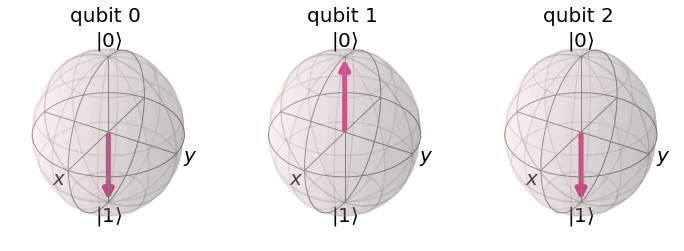

In [22]:
# Get results
result = execute(qc, backend=simulator).result()
statevector = result.get_statevector()
print(statevector)
plot_bloch_multivector(statevector)

Just as expected, our initial state of $\ket{110}$ becomes $\ket{101}$ as the second and third qubits have been successfully swapped.

# Entanglement

We learned in the last workshop that to entangle two qubits, we apply a Hadamard to one qubit, then using that qubit as the control qubit of a CNOT. 

Let's build that in Qiskit:

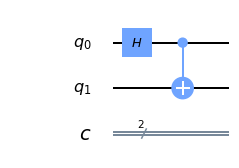

In [23]:
# Circuit needs at least two qubits
qc = QuantumCircuit(2,2)
# Apply the Hadamard to the first qubit, then use it as the control for CNOT
qc.h(0)
qc.cx(0,1)
qc.draw(output="mpl")

[0.70710678+0.j 0.        +0.j 0.        +0.j 0.70710678+0.j]


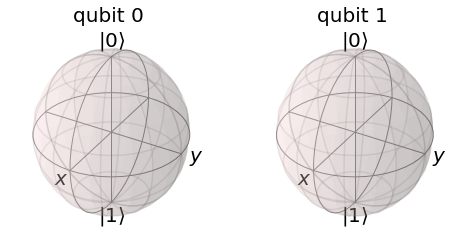

In [24]:
# Get results
result = execute(qc, backend=simulator).result()
statevector = result.get_statevector()
print(statevector)
plot_bloch_multivector(statevector)

Note that although we have a state vector that matches what we've seen before in two qubit entanglement, we can't actually plot it on the bloch sphere. This is why the bloch sphere is limited to one qubit states, as we have to treat the two qubits as a single quantum mechanical system, unable to be seperated from eachother.

There are more advanced tools for multi-qubit system visualization but this will be shown to you in a future workshop.

# Towards Realistic Simultations

So far, we've been using the "statevector" simulator as our backend. This is identical to the idealized, math we've been doing so far, getting nice clean matrices and vectors.

The truth is that such nice results are non-existent (for now) in real world Quantum Computing. There will alway be error from the environment, unwanted noise, hardware imperfections, that may cause spurious or unwatned results.

To demonstrate this, we'll perform our entanglement circuit again but on the "qasm_simulator" backend which allows us to simulate this noise.

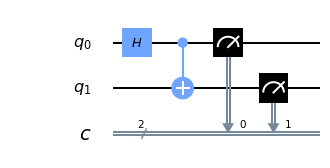

In [38]:
qc = QuantumCircuit(2,2)
qc.h(0)
qc.cx(0,1)
# Because we're actually simulating real-world quantum computation, the final results will be
# the collapsed states of each qubit. 
# We measure each qubit (0 and 1) and then store it in the classical register which also
# has two bits (0 and 1)
qc.measure([0,1], [0,1])
qc.draw(output="mpl")

In prior circuits, we were able to just apply the gates and get a statevector representing all the probabilities of getting $\ket{00}$, $\ket{01}$, etc.

In real-world quantum computation, we are unable to meaure this superposition state and get all the data out. We can however, perform a measurement that forces the qubit to become one of two states (the basis states) $\ketzero$ and $\ketone$. 

The results of this measurement are stored in the classical register, which also has two bits.

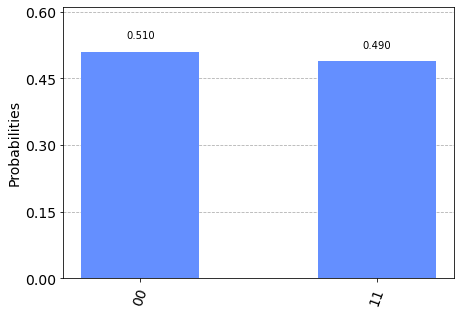

In [39]:
# choose the new backend and then execute the circuit
simulator = Aer.get_backend("qasm_simulator")
# Notice there is a new argument we've added "shots=1000". 
# This means we run and apply measurement on the circuit 1000 times. 
# Running the circuit multiple times helps reduce the errors noise might introduce.
result = execute(qc, backend=simulator, shots=1000).result()
counts = result.get_counts(qc)
plot_histogram(counts)

The bar graph shows the chances we can have $\ket{00}$ and $\ket{11}$. Previous workshops have shown that for an entangled state, we should have a 50-50 (.5 - .5) split between $\ket{00}$ and $\ket{11}$. 

The result above is close, but it's very easy to see there is some "skew" in the answer.

The advantages of running the circuit multiple times are made apparent in the example below where we just run the circuit 10 instead of 1000 times:

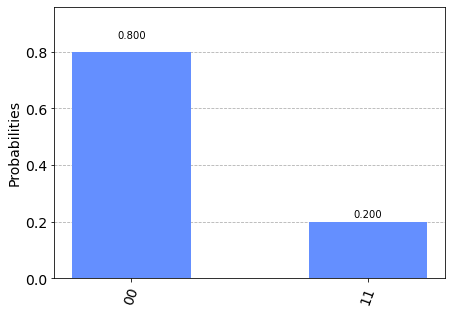

In [42]:
result = execute(qc, backend=simulator, shots=10).result()
counts = result.get_counts(qc)
plot_histogram(counts)

If we did the math, we should still get 50-50 but owing to the nature of noise and other currently uncontrollable environmental factors, we get this grossly skewed result.

# Coming Up

In our next workshop, we'll look at more realistic noise models and introduce you to your first Quantum Algorithms!